# Regression with Perceptron

In the week 2 assignment, you implemented the gradient descent method to build a linear regression model, predicting sales given a TV marketing budget. In this lab, you will construct a neural network corresponding to the same simple linear regression model. Then you will train the network, implementing the gradient descent method. After that you will increase the complexity of the neural network to build a multiple linear regression model, predicting house prices based on their size and quality.

*Note*: The same models were discussed in Course 1 "Linear Algebra" week 3 assignment, but model training with backward propagation was omitted.

# Table of Contents

- [ 1 - Simple Linear Regression](#1)
  - [ 1.1 - Simple Linear Regression Model](#1.1)
  - [ 1.2 - Neural Network Model with a Single Perceptron and One Input Node](#1.2)
  - [ 1.3 - Dataset](#1.3)
- [ 2 - Implementation of the Neural Network Model for Linear Regression](#2)
  - [ 2.1 - Defining the Neural Network Structure](#2.1)
  - [ 2.2 - Initialize the Model's Parameters](#2.2)
  - [ 2.3 - The Loop](#2.3)
  - [ 2.4 - Integrate parts 2.1, 2.2 and 2.3 in nn_model() and make predictions](#2.4)
- [ 3 - Multiple Linear Regression](#3)
  - [ 3.1 - Multipe Linear Regression Model](#3.1)
  - [ 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes](#3.2)
  - [ 3.3 - Dataset](#3.3)
  - [ 3.4 - Performance of the Neural Network Model for Multiple Linear Regression](#3.4)

## Packages

Let's first import all the required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

<a name='1'></a>
## 1 - Simple Linear Regression

<a name='1.1'></a>
### 1.1 - Simple Linear Regression Model

You can describe a simple linear regression model as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, you will find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

<a name='1.2'></a>
### 1.2 - Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model that describes the above problem can be realized by using one **perceptron**. The **input** and **output** layers will have one **node** each ($x$ for input and $\hat{y} = z$ for output):

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">

**Weight** ($w$) and **bias** ($b$) are the parameters that will get updated when you **train** the model. They are initialized to some random values or set to 0 and updated as the training progresses.

For each training example $x^{(i)}$, the prediction $\hat{y}^{(i)}$ can be calculated as:

\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{2}\end{align}

where $i = 1, \dots, m$.

You can organise all training examples as a vector $X$ of size ($1 \times m$) and perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to a vector of size ($1 \times m$):

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{3}\end{align}

This set of calculations is called **forward propagation**.

For each training example you can measure the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives. To compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{4}$$

This function is called the sum of squares **cost function**. The aim is to optimize the cost function during the training, which will minimize the differences between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$.

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results. You need to calculate the adjustments for the weight and bias, minimizing the cost function. This process is called **backward propagation**. 

According to the gradient descent algorithm, you can calculate partial derivatives as:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\tag{5}\end{align}

You can see how the additional division by $2$ in the equation $(4)$ helped to simplify the results of the partial derivatives. Then update the parameters iteratively using the expressions

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{6}\end{align}

where $\alpha$ is the learning rate. Then repeat the process until the cost function stops decreasing.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

You often build helper functions to compute steps 1-3 and then merge them into one function `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

me='1.3'></a>
### 1.3 - Dataset

Load the [Kaggle dataset](https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook), saved in a file `data/tvmarketing.csv`. It has two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

In [2]:
path = "data/tvmarketing.csv"

adv = pd.read_csv(path)

Print some part of the dataset.

In [4]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


And plot it:

<Axes: xlabel='TV', ylabel='Sales'>

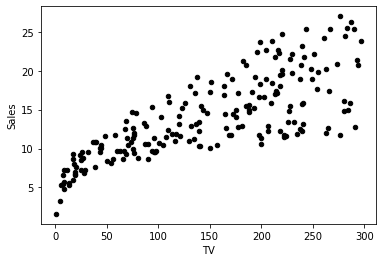

In [5]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

The fields `TV` and `Sales` have different units. Remember that in the week 2 assignment to make gradient descent algorithm efficient, you needed to normalize each of them: subtract the mean value of the array from each of the elements in the array and divide them by the standard deviation.

Column-wise normalization of the dataset can be done for all of the fields at once and is implemented in the following code:

In [6]:
adv_norm = (adv - np.mean(adv))/np.std(adv)

c:\users\bruno\appdata\local\programs\python\python38\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Plotting the data, you can see that it looks similar after normalization, but the values on the axes have changed:

<Axes: xlabel='TV', ylabel='Sales'>

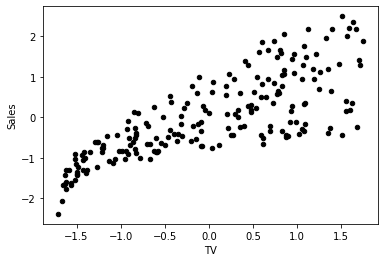

In [7]:
adv_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

Save the fields into variables `X_norm` and `Y_norm` and reshape them to row vectors:

In [8]:
X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y_norm: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
I have m = 200 training examples!


<a name='2'></a>
## 2 - Implementation of the Neural Network Model for Linear Regression

Setup the neural network in a way which will allow to extend this simple case of a model with a single perceptron and one input node to more complicated structures later.

<a name='2.1'></a>
### 2.1 - Defining the Neural Network Structure

Define two variables:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

using shapes of arrays `X` and `Y`.